# JEUDI 28 OCTOBRE - KATA GRAPHIQUES

## GRAPHE 1

*Réaliser un graphique avec deux axes. L'axe des abscisses va de 0 à 50 et s'intitule "Axe des x". L'axe des ordonnées s'intitule "Axe des y".  
Tracer la droite d'équation : x = 3y. Avec x allant de 0 à 50.
Le graphe possède le titre suivant "Tracer une droite" et la droite est de couleur rouge.*

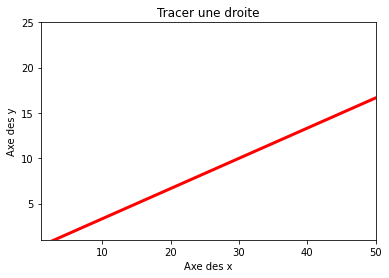

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


x = list()
y = list(range(51))

def droite(x,y):
  for i in y:
    new = 3 * y[i]
    x.append(new)
  return x

droite(x,y)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y, color='red', linewidth=3)
ax.set(xlim=[1, 50],ylim=[1, 25])
ax.set(title='Tracer une droite', ylabel='Axe des y', xlabel='Axe des x')
plt.show()

## GRAPHE 2

*En premier lieu, nous souhaitons un graphe qui donne la courbe du profit total réalisé chaque mois.*

In [3]:
df = pd.read_csv("company_sales_data.csv")
df

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
0,1,2500,1500,5200,9200,1200,1500,21100,211000
1,2,2630,1200,5100,6100,2100,1200,18330,183300
2,3,2140,1340,4550,9550,3550,1340,22470,224700
3,4,3400,1130,5870,8870,1870,1130,22270,222700
4,5,3600,1740,4560,7760,1560,1740,20960,209600
5,6,2760,1555,4890,7490,1890,1555,20140,201400
6,7,2980,1120,4780,8980,1780,1120,29550,295500
7,8,3700,1400,5860,9960,2860,1400,36140,361400
8,9,3540,1780,6100,8100,2100,1780,23400,234000
9,10,1990,1890,8300,10300,2300,1890,26670,266700


In [4]:
x = df['month_number']
y1 = df['facecream']
y2 = df['facewash']
y3 = df['toothpaste']
y4 = df['bathingsoap']
y5 = df['shampoo']
y6 = df['moisturizer']

#Je découvre avec horreur que les données sont fausses pour certains mois : 
# le total d'unités vendu est supérieur à la somme des unités vendues pour chaque produit. 
# Je réinitialise le tableau en modifiant cette donnée.

df['total_units'] = y1 + y2 + y3 + y4 + y5 + y6
df['total_profit'] = df['total_units'] * 10
df

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
0,1,2500,1500,5200,9200,1200,1500,21100,211000
1,2,2630,1200,5100,6100,2100,1200,18330,183300
2,3,2140,1340,4550,9550,3550,1340,22470,224700
3,4,3400,1130,5870,8870,1870,1130,22270,222700
4,5,3600,1740,4560,7760,1560,1740,20960,209600
5,6,2760,1555,4890,7490,1890,1555,20140,201400
6,7,2980,1120,4780,8980,1780,1120,20760,207600
7,8,3700,1400,5860,9960,2860,1400,25180,251800
8,9,3540,1780,6100,8100,2100,1780,23400,234000
9,10,1990,1890,8300,10300,2300,1890,26670,266700


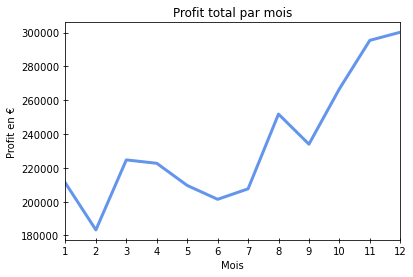

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, df['total_profit'], color='cornflowerblue', linewidth=3)
ax.set(xlim=[1, 12])
ax.xaxis.set(ticks=range(1,13))
ax.set(title='Profit total par mois', ylabel='Profit en €', xlabel='Mois')
ax.tick_params(axis='both', direction='inout',length=5)
plt.show()

Text(0.5, 0, 'Mois')

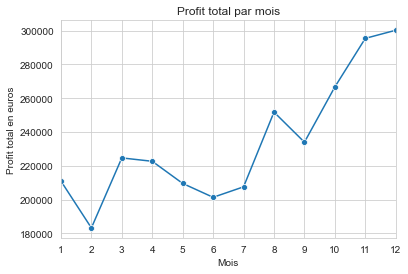

In [6]:
#La même avec Seaborn pour le sport
import seaborn as sns
sns.set_style("whitegrid")

sns.lineplot(x=x,y=df['total_profit'],ci=None, marker='o',data=df)
plt.xlim(1,12) #permet de définir un graphique correspondant exactement à mes valeurs à gauche et à droite
plt.xticks(range(1,13)) #permet d'avoir un tick par mois plutôt que 1 sur 2
plt.title("Profit total par mois")
plt.ylabel("Profit total en euros")
plt.xlabel("Mois")


## GRAPHE 3

*Ensuite, nous souhaitons un graphe qui donne la courbe de profit pour chaque produit, en fonction du temps.
Chaque courbe aura une couleur différente et nous souhaitons une légende qui indique quelle couleur correspond à quel produit.*

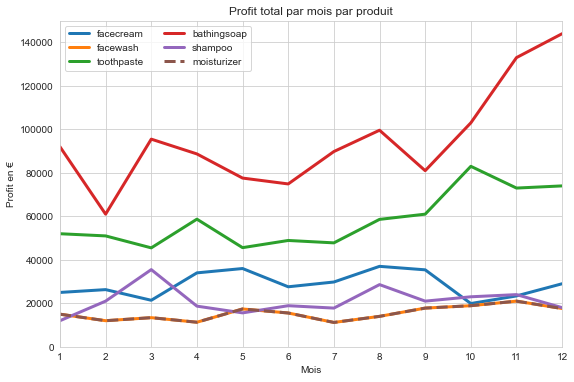

In [7]:
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111)
ax.plot(x,y1*10,label='facecream',linewidth=3.0)
ax.plot(x,y2*10,label='facewash',linewidth=3.0)
ax.plot(x,y3*10,label='toothpaste',linewidth=3.0)
ax.plot(x,y4*10,label='bathingsoap',linewidth=3.0)
ax.plot(x,y5*10,label='shampoo',linewidth=3.0)
ax.plot(x,y6*10,label='moisturizer',linewidth=3.0,ls='--')
ax.legend(loc='upper left',ncol=2)
ax.set(xlim=[1, 12],ylim=[0,150000])
ax.xaxis.set(ticks=range(1,13))
ax.set(title='Profit total par mois par produit', ylabel='Profit en €', xlabel='Mois')
ax.tick_params(axis='both', direction='inout',length=5)
#plt.savefig('q3.png')
plt.show()

(1.0, 12.0)

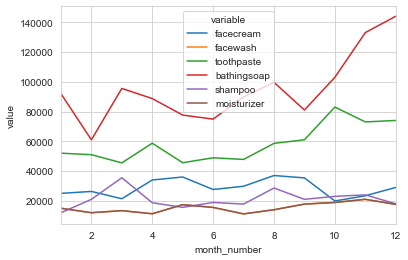

In [8]:
#la même mais avec seaborn pour le sport, pour ça il faut que je "melt" ma dataframe : 
# au lieu d'avoir une df avec de multiples colonnes,
# je ne garde que 2 colonnes (+ index) avec variable (nom de la colonne) + value (valeur correspondant à l'index)
# sinon je ne peux pas faire de graphique de plusieurs lignes avec seaborn
df2 = df
df2['facecream'] = y1*10
df2['facewash'] = y2*10
df2['toothpaste'] = y3*10
df2['bathingsoap'] = y4*10
df2['shampoo'] = y5*10
df2['moisturizer'] = y6*10
df2 #je crée d'abord une copie du df original avec le nombre de produit * 10 pour connaître leur valeur.

#puis je crée la df melt avec les 6 produits
melt_df = pd.melt(df2, id_vars=['month_number'], value_vars=['facecream','facewash','toothpaste','bathingsoap','shampoo','moisturizer'])
# pour une raison étrange je me retrouve avec un 78 comme nombre de mois pour toutes les variables, 
# ce qui fait un graphique bizarre.
# comme il n'y a pas de valeur associée je peux directement le supprimer
melt_df = melt_df.dropna() 

sns.lineplot(data = melt_df, x='month_number',y='value', hue='variable')
plt.xlim(1,12)




## GRAPHE 4 (oui il y en a plusieurs je me suis amusée)

*Nous souhaitons un graphe qui compare, chaque mois, le nombre d'unités vendus pour chaque produit. A vous de choisir la meilleure représentation pour connaître le produit le plus vendu par mois.*

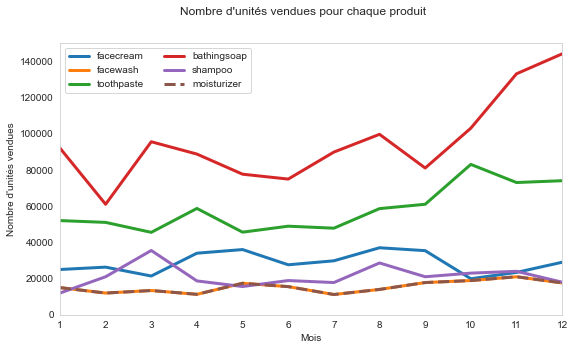

0      92000
1      61000
2      95500
3      88700
4      77600
5      74900
6      89800
7      99600
8      81000
9     103000
10    133000
11    144000
Name: bathingsoap, dtype: int64

In [10]:
x = df['month_number']
y1 = df['facecream']
y2 = df['facewash']
y3 = df['toothpaste']
y4 = df['bathingsoap']
y5 = df['shampoo']
y6 = df['moisturizer']

fig = plt.figure(figsize=(9, 5))
fig.suptitle("Nombre d'unités vendues pour chaque produit")
ax = fig.add_subplot(111)
ax.plot(x,y1,label='facecream',linewidth=3.0)
ax.plot(x,y2,label='facewash',linewidth=3.0)
ax.plot(x,y3,label='toothpaste',linewidth=3.0)
ax.plot(x,y4,label='bathingsoap',linewidth=3.0)
ax.plot(x,y5,label='shampoo',linewidth=3.0)
ax.plot(x,y6,label='moisturizer',linewidth=3.0,ls='--')
ax.legend(loc='upper left',ncol=2)
ax.set(xlim=[1, 12],ylim=[0,150000])
ax.grid(axis='both')
ax.xaxis.set(ticks=range(1,13))
ax.set(ylabel="Nombre d'unités vendues", xlabel='Mois')
ax.tick_params(axis='both', direction='inout',length=5)

# plt.savefig('q4.png')
plt.show()

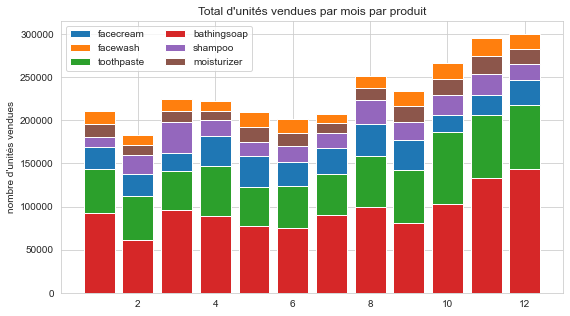

In [11]:
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots(figsize=(9, 5))

ax.bar(x, y1, bottom=y4+y3,label='facecream')
ax.bar(x, y2, bottom=y4+y3+y1+y5+y6,label='facewash')
ax.bar(x,y3,bottom=y4,label='toothpaste')
ax.bar(x,y4,label='bathingsoap')
ax.bar(x,y5,bottom=y4+y3+y1,label='shampoo')
ax.bar(x,y6,bottom=y4+y3+y1+y5,label='moisturizer')

ax.set_ylabel("nombre d'unités vendues")
ax.set_title("Total d'unités vendues par mois par produit")
ax.legend(loc='upper left',ncol=2)

plt.show()

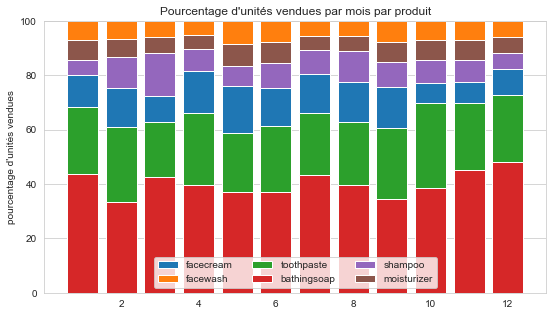

In [24]:
#calculer un pourcentage
x = df['month_number']
pcty1 = y1 * 10 / df['total_units']
pcty2 = y2 * 10 / df['total_units']
pcty3 = y3 * 10 / df['total_units']
pcty4 = y4 * 10 / df['total_units']
pcty5 = y5 * 10 / df['total_units']
pcty6 = y6 * 10 / df['total_units']
result = pcty1 + pcty2 + pcty3 + pcty4 + pcty5 + pcty6

fig, ax = plt.subplots(figsize=(9, 5))

ax.bar(x,pcty1, bottom=pcty4+pcty3,label='facecream')
ax.bar(x,pcty2, bottom=pcty4+pcty3+pcty1+pcty5+pcty6,label='facewash')
ax.bar(x,pcty3,bottom=pcty4,label='toothpaste')
ax.bar(x,pcty4,label='bathingsoap')
ax.bar(x,pcty5,bottom=pcty4+pcty3+pcty1,label='shampoo')
ax.bar(x,pcty6,bottom=pcty4+pcty3+pcty1+pcty5,label='moisturizer')
ax.set(ylim=[0, 100])
ax.set_ylabel("pourcentage d'unités vendues")
ax.set_title("Pourcentage d'unités vendues par mois par produit")
ax.legend(loc='lower center',ncol=3)

plt.show()


## GRAPHE 5

*Nous souhaitons un graphe qui donne la contribution de chaque produit dans le profit total (sur l'année étudiée). Merci d'ajouter le pourcentage pour chaque produit.*

Pour ce, j'ajoute une ligne total à mon tableau

In [ ]:
df2 = df
df2.loc['Total']= df2.sum()
df_total = df2.iloc[[-1]] #je garde seulement la dernière ligne (Total)
df_total = df_total.iloc[:, 1:] #j'enlève la première colonne
df_total
#df2['Total'][0]

,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
Total,344800,185150,699100,1140100,254100,185150,280840,2808400


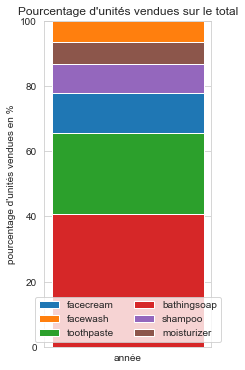

In [20]:
y1t = df_total['facecream'] * 100 / df_total['total_profit']
y2t = df_total['facewash'] * 100 / df_total['total_profit']
y3t = df_total['toothpaste'] * 100 / df_total['total_profit']
y4t = df_total['bathingsoap'] * 100 / df_total['total_profit']
y5t = df_total['shampoo'] * 100 / df_total['total_profit']
y6t = df_total['moisturizer'] * 100 / df_total['total_profit']

fig, ax = plt.subplots(figsize=(3, 6))
label = "année"
ax.bar(label, y1t, bottom=y4t+y3t,label='facecream')
ax.bar(label, y2t, bottom=y4t+y3t+y1t+y5t+y6t,label='facewash')
ax.bar(label,y3t,bottom=y4t,label='toothpaste')
ax.bar(label,y4t,label='bathingsoap')
ax.bar(label,y5t,bottom=y4t+y3t+y1t,label='shampoo')
ax.bar(label,y6t,bottom=y4t+y3t+y1t+y5t,label='moisturizer')
ax.set(ylim=[0, 100])
ax.set_ylabel("pourcentage d'unités vendues en %")
ax.set_title("Pourcentage d'unités vendues sur le total")
ax.legend(loc='lower center',ncol=2)

plt.show()

# **OH SHIT IL EST 18H30 ET DANS MA FRENESIE DE TOUT REFAIRE AVEC SEABORN JE N'AI PAS FAIT LA MOITIE DU TRAVAIL DU JOUR**

## GRAPHE 6

In [ ]:
mdf = pd.read_csv('muret.csv')
mdf

,id_prod,session_id,client_id,Date,Time,price,categ,sex,birth
0,0_1483,s_18746,c_4450,2021-04-10,18:37:28,4.99,0,f,1977
1,0_1085,s_97382,c_4450,2021-09-29,11:14:59,3.99,0,f,1977
2,0_1453,s_81509,c_4450,2021-08-27,19:50:46,7.99,0,f,1977
3,0_1405,s_81509,c_4450,2021-08-27,20:07:25,4.99,0,f,1977
4,0_1392,s_141302,c_4450,2021-12-28,11:45:04,6.30,0,f,1977
...,...,...,...,...,...,...,...,...,...
335697,1_673,s_42350,c_2793,2021-06-01,00:49:49,12.99,1,m,1933
335698,0_2075,s_102200,c_2793,2021-10-09,09:03:48,8.99,0,m,1933
335699,0_1692,s_90430,c_4478,2021-09-15,19:42:08,13.36,0,f,1970
335700,0_142,s_95415,c_1232,2021-09-25,18:07:25,19.85,0,f,1960


*D'abord, nous souhaitons avoir un graphe pie chart qui donne la répartition des produits par catégorie. Merci d'indiquer le pourcentage par produit (nb de produits de telle catégorie / nb de produits totaux).*

Text(0.5, 1.0, 'Répartion des produits par catégorie')

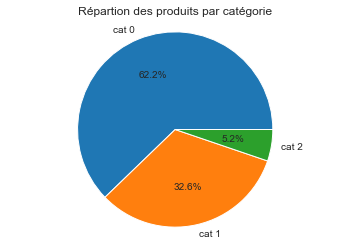

In [ ]:
cat = mdf.groupby(['categ']).agg({'id_prod': np.size})
plt.pie(cat['id_prod'],labels = ['cat 0', 'cat 1', 'cat 2'],autopct='%1.1f%%')
plt.axis('equal')
plt.title("Répartion des produits par catégorie")


*Nous souhaitons un graphe qui donne l'évolution du CA pour chaque catégorie (en fonction du temps).*

Pour que ce soit plus facile d'analyser en fonction du temps, je vais split la colonne Date pour extraire le mois. Ensuite je supprime les colonnes qui ne sont plus utiles : Data, Time, Année (toutes les données sont de 2021), Jour

In [ ]:
mdf[['Année','Mois','Jour']] = mdf["Date"].str.split('-',expand=True,)
mdf = mdf.drop(["Date", 'Time', "Jour"], axis =1)
mdf = mdf.loc[mdf['Année'] != '2022']
mdf.sort_values('Mois')

,id_prod,session_id,client_id,price,categ,sex,birth,Année,Mois
335701,2_98,s_3637,c_5967,149.74,2,f,2003,2021,03
178179,0_2175,s_9744,c_2786,18.99,0,f,1974,2021,03
35241,1_265,s_10065,c_3454,24.99,1,m,1969,2021,03
178184,1_129,s_11848,c_2786,18.99,1,f,1974,2021,03
178219,1_449,s_9228,c_4587,14.99,1,m,1975,2021,03
...,...,...,...,...,...,...,...,...,...
164469,0_1613,s_133069,c_2422,8.99,0,f,1990,2021,12
105564,0_1584,s_136655,c_6297,11.85,0,f,1969,2021,12
38397,0_1671,s_128076,c_3107,3.99,0,m,1986,2021,12
164476,1_389,s_136049,c_2422,24.99,1,f,1990,2021,12


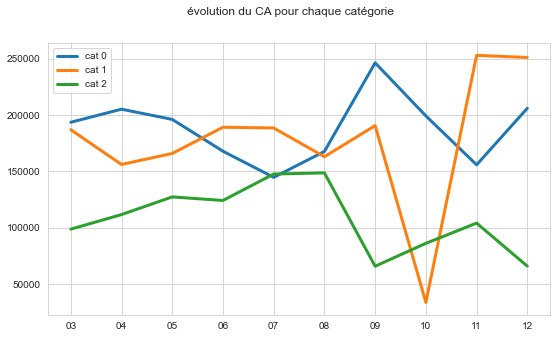

In [30]:
ca = pd.pivot_table(mdf, values='price',index='Mois',columns='categ',aggfunc=np.sum).reset_index()
ca
x = ca['Mois']
my1 = ca[0]
my2 = ca[1]
my3 = ca[2]
x
fig = plt.figure(figsize=(9, 5))
fig.suptitle("évolution du CA pour chaque catégorie")
ax = fig.add_subplot(111)
ax.plot(x,my1,label='cat 0',linewidth=3.0)
ax.plot(x,my2,label='cat 1',linewidth=3.0)
ax.plot(x,my3,label='cat 2',linewidth=3.0)
plt.legend()
plt.show()
